# 1. Bayes Classifier
Bayes Rule:

$p(y|x) = \frac{p(x|y)p(y)}{p(x)}$

- For each class $y$, we model $p(x|y)$, rather than directly modeling $p(y|x)$.
- Learn $p(x|y) = N(\mu_{y}, \Sigma_{y})$ where $\mu_y$ is the mean of those $x$'s belongs to class $y$, $\Sigma_y$ is the covariance of those $x$'s.
# 1-1. Single Gaussian Model
Sampling from the Bayes classifier:
- Sample from a given $k$ class directly. We know $p(x|y = k)$ is a Gaussian, so that we can sample from this Gaussian. 
- Sample from $p(y)p(x|y) = p(x,y)$. Sample from $p(y)$ first. Now we have $y$, so that sample from $p(x|y)$.

1. `scipy.stats.multivariate_normal.rvs(mean=None, cov=1, size=1, random_state=None)`: Draws random samples from a multivariate normal distribution.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal as mvn

In [2]:
def clamp_sample(x):
    x = np.minimum(x, 1)
    x = np.maximum(x, 0)
    return x

class BayesClassifier:
    def fit(self, X, Y):
        # Assume classes are numbered 0, ..., k - 1
        self.K = len(set(Y))
        self.gaussians = []
        self.p_y = np.zeros(self.K)

        # Loop through each class
        for k in range(self.K):
            Xk = X[Y == k]
            self.p_y[k] = len(Xk)
            # Get the mean value (array with ndim = 1) of the y-axis (all data in the `k` class)
            mean = Xk.mean(axis=0)
            # Covariance matrix (array with )
            cov = np.cov(Xk.T)
            
            # print(cov.shape)
            # (784, 784)
            # print(cov.ndim)
            # 2
            
            # Gaussians
            g = {'m': mean, 'c': cov}
            self.gaussians.append(g)
        # Normalize p(y)
        self.p_y /= self.p_y.sum()

    # Draw random samples from a multivariate normal distribution using `mvn.rvs()`
    def sample_given_y(self, y):
        g = self.gaussians[y]
        return clamp_sample(mvn.rvs(mean=g['m'], cov=g['c']))

    # Random sampling
    def sample(self):
        # print(self.K)
        # 10
        # print(self.p_y)
        # [0.09838095 0.11152381 0.09945238 0.10359524 0.09695238 0.09035714 0.0985     0.10478571 0.0967381  0.09971429]

        # `random.choice()` generates a uniform random sample of size `K` & the probabilities associated with each entry are `p_y`
        y = np.random.choice(self.K, p=self.p_y)
        # print(y)
        # 6
        
        return clamp_sample(self.sample_given_y(y))

In [3]:
import pandas as pd
from sklearn.utils import shuffle

df = pd.read_csv("datasets/digit-recognizer/train.csv")
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data = df.values
data

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [7, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0]])

In [5]:
X = data[:, 1:] / 255.0
Y = data[:, 0]
X, Y = shuffle(X, Y)

In [6]:
clf = BayesClassifier()
clf.fit(X, Y)

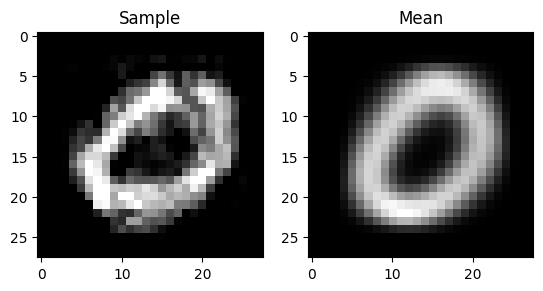

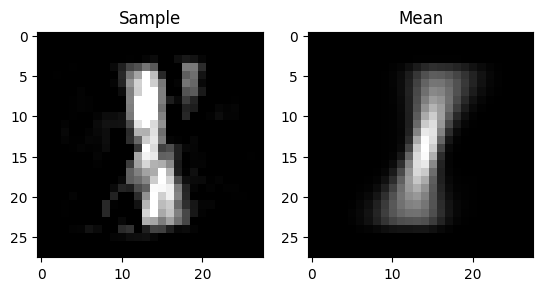

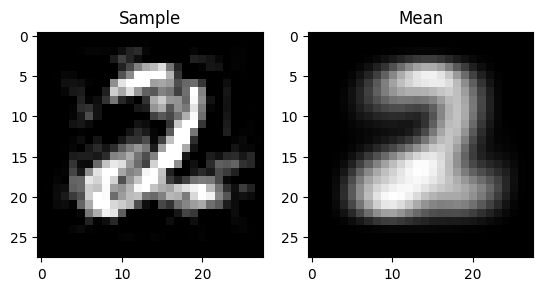

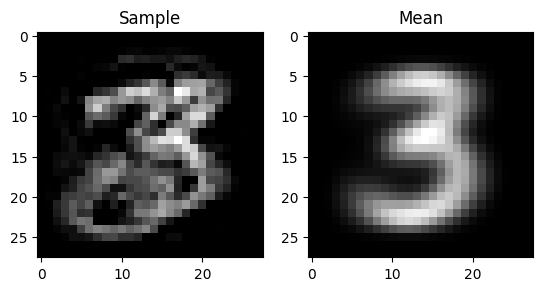

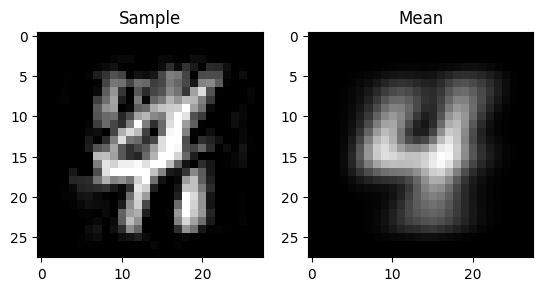

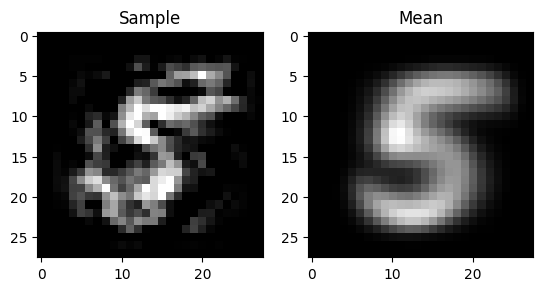

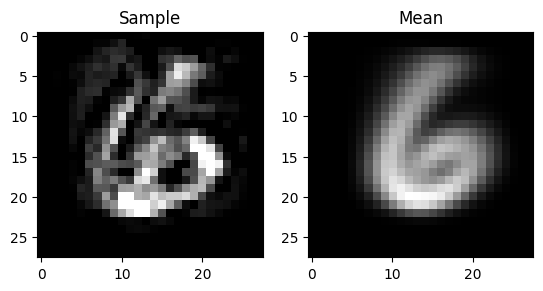

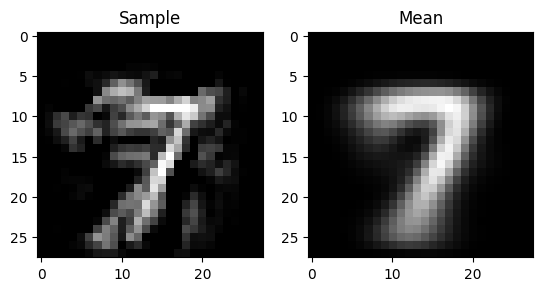

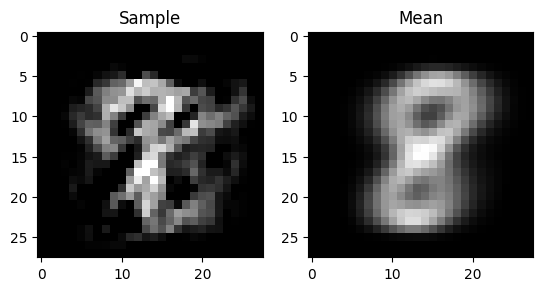

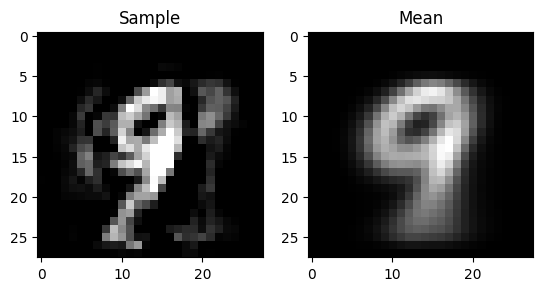

In [7]:
for k in range(clf.K):
    sample = clf.sample_given_y(k).reshape(28, 28)
    mean = clf.gaussians[k]['m'].reshape(28, 28)

    plt.subplot(1,2,1)
    plt.imshow(sample, cmap='gray')
    plt.title("Sample")
    plt.subplot(1,2,2)
    plt.imshow(mean, cmap='gray')
    plt.title("Mean")
    plt.show()

In [13]:
# Generate a random sample
sample = clf.sample().reshape(28, 28)
plt.imshow(sample, cmap='gray')
plt.title("Random Sample from Random Class")
plt.show()

(array([[ 4.05621947e-04,  7.73590372e-04,  7.10280412e-04,
         2.17734769e-04,  3.32477648e-04,  2.04046484e-04,
        -6.09210086e-04, -6.59084777e-04,  2.59957929e-04,
        -5.30472889e-04,  6.89078653e-04, -6.47699930e-04,
        -1.03690996e-04,  8.17379603e-04,  3.34610931e-04,
         4.26376037e-04,  7.28285309e-04, -1.20289805e-03,
        -3.56372587e-04, -8.51479960e-05,  8.06948973e-04,
         1.10434821e-03,  4.15976723e-05, -1.69835442e-04,
        -1.43435076e-03,  2.78813720e-04, -5.68950053e-04,
         7.39520505e-04, -9.39143969e-05,  6.27685538e-04,
         4.55584786e-04, -2.45144043e-04, -1.24442958e-04,
        -2.50104779e-05,  4.93008433e-04,  9.96181201e-04,
         5.99222246e-04,  5.40614413e-04, -3.58271199e-04,
         8.32124435e-04,  3.69733285e-04, -1.21804443e-03,
         1.30362862e-03, -1.24829848e-04, -1.19854000e-03,
         1.61881638e-03,  4.43176874e-04,  6.33009263e-04,
        -3.47118700e-04,  4.67167916e-04, -2.91328305e-

ValueError: cannot reshape array of size 1568 into shape (28,28)

# 1-2. Gaussian Mixture Model
With **Gaussian Mixture Model (GMM)** for $p(x|y)$:
- We first sample from $p(y)$, class frequencies, for $y$.
- From $p(z|y)$, different writing styles, for $z$.
- Then $p(x|z,y)$.

1. `sklearn.mixture.BayesianGaussianMixture(*, n_components=1, covariance_type='full', tol=0.001, reg_covar=1e-06, max_iter=100, n_init=1, init_params='kmeans', weight_concentration_prior_type='dirichlet_process', weight_concentration_prior=None, mean_precision_prior=None, mean_prior=None, degrees_of_freedom_prior=None, covariance_prior=None, random_state=None, warm_start=False, verbose=0, verbose_interval=10)`: Variational Bayesian estimation of a Gaussian mixture.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import BayesianGaussianMixture

In [2]:
def clamp_sample(x):
    x = np.minimum(x, 1)
    x = np.maximum(x, 0)
    return x

class BayesClassifier:
    def fit(self, X, Y):
        # Assume classes are numbered 0, ..., k - 1
        self.K = len(set(Y))
        self.gaussians = []
        self.p_y = np.zeros(self.K)

        # Loop through each class
        for k in range(self.K):
            print("Fitting GMM", k)
            Xk = X[Y == k]
            self.p_y[k] = len(Xk)
            # `BayesianGaussianMixture()`
            gmm = BayesianGaussianMixture(n_components=10)
            gmm.fit(Xk)
            self.gaussians.append(gmm)      
        # Normalize p(y)
        self.p_y /= self.p_y.sum()

    def sample_given_y(self, y):
        gmm = self.gaussians[y]

        # Return the sample & which cluster it came from
        sample = gmm.sample()
        # print(sample[0].shape)
        # (1, 784)
        # print(sample[0].ndim)
        # 2
        
        mean = gmm.means_[sample[1]]
        # print(mean.shape)
        # (1, 784)
        # print(mean.ndim)
        # 2
        
        return clamp_sample(sample[0].reshape(28, 28)), mean.reshape(28, 28)

    def sample(self):
        y = np.random.choice(self.K, p=self.p_y)
        return clamp_sample(self.sample_given_y(y))

In [6]:
clf = BayesClassifier()
clf.fit(X, Y)

Fitting GMM 0
Fitting GMM 1
Fitting GMM 2
Fitting GMM 3
Fitting GMM 4
Fitting GMM 5
Fitting GMM 6
Fitting GMM 7
Fitting GMM 8
Fitting GMM 9


(array([[-6.41137301e-04, -1.44979271e-03, -1.01318555e-03,
         1.39116248e-04,  3.08898510e-04, -1.99448704e-03,
         7.62829438e-04,  7.39112992e-04,  1.82219257e-04,
         3.21083094e-04, -8.27588120e-04,  2.69802564e-04,
         7.14824976e-05, -6.24545277e-04,  5.05638734e-04,
         5.30660350e-04, -2.44382930e-05,  1.30356876e-03,
        -5.88291476e-04,  7.47232630e-04,  6.10783502e-04,
        -2.88879002e-06,  3.41713111e-04,  1.50343096e-03,
        -4.18483800e-04,  1.51001856e-03,  9.76049984e-04,
        -7.92732416e-04,  4.87563195e-04, -1.04401798e-04,
         8.72897400e-04,  2.57193053e-04, -1.47283842e-03,
         5.57427049e-05, -3.90966363e-04,  1.13231179e-05,
         1.12551334e-03,  7.87988754e-04, -6.60818931e-04,
         7.95706821e-04, -1.12128562e-04,  5.67118025e-04,
         3.59886822e-04, -3.00260914e-05, -4.51106857e-04,
         4.86815664e-04, -1.52693655e-04, -3.66559349e-04,
        -8.70808527e-05,  8.06213091e-05, -3.63790643e-

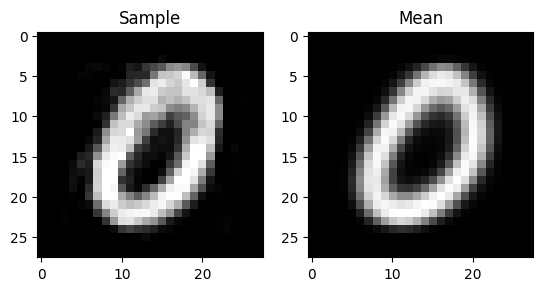

(array([[-6.49421365e-04,  7.63324287e-05, -1.37289971e-04,
         2.68836568e-04,  2.70510935e-04, -1.69356819e-04,
         4.01428965e-04, -1.30095490e-03, -1.08124401e-03,
         5.47072429e-04,  4.43878702e-04, -6.55538837e-04,
         1.95655815e-05, -5.73909914e-05,  7.46781640e-05,
        -5.22196619e-04, -5.04875194e-04,  1.27792736e-04,
        -5.70138379e-04,  4.51449816e-04,  1.32204467e-04,
         7.08233306e-04,  1.27082778e-04,  4.66135711e-04,
         4.11160146e-05,  9.39750656e-05, -1.35576994e-03,
         1.33622605e-03,  1.78368859e-05,  1.16798829e-03,
         8.40359646e-04,  6.32398441e-04,  4.06149198e-04,
        -8.24421218e-04,  7.10097191e-04,  9.52530124e-05,
         1.20897178e-03,  1.01167624e-03,  1.15454720e-03,
        -7.06536480e-04,  7.05211471e-04, -2.57380431e-04,
         1.47952298e-03,  3.59958282e-03, -7.59157784e-04,
         2.08694832e-04,  2.69353643e-04, -1.17311833e-03,
         6.38362803e-05, -6.85433027e-04, -4.21509165e-

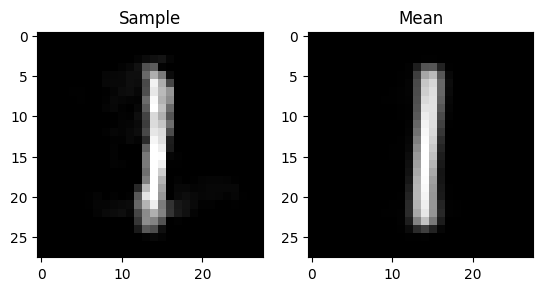

(array([[-5.20061279e-05, -1.15825583e-04, -2.37140367e-04,
         2.64902137e-04,  1.19158391e-05, -4.99800724e-04,
        -6.65733047e-04,  5.77770382e-04,  3.26281107e-04,
        -1.53461869e-04, -3.59652412e-04, -1.34429475e-04,
         4.71609134e-05,  1.38186020e-04,  7.80310627e-04,
        -2.70698261e-04, -3.58299508e-04,  7.44479984e-04,
        -4.13147399e-04,  2.15700914e-04,  1.48684215e-04,
        -4.44166566e-04,  1.00448610e-04,  7.71889728e-04,
         1.63359241e-04, -8.46607799e-04,  5.89190848e-04,
         8.86803189e-04, -4.41725136e-04,  5.99883254e-05,
         4.80552483e-04,  5.52080866e-04, -1.95296613e-04,
        -2.31440596e-05,  3.39511316e-04, -1.30141883e-03,
        -1.35737730e-02, -1.18409841e-02, -1.10097552e-02,
        -3.42901869e-03, -1.37246416e-03, -7.48653741e-03,
        -3.06130421e-03,  6.55689209e-03,  3.58081750e-02,
         4.07244905e-02,  2.04037014e-03,  2.88045099e-04,
         3.04229987e-04,  9.39877391e-04, -7.52353736e-

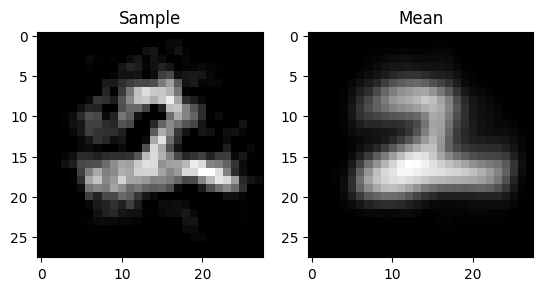

(array([[ 8.46010608e-04, -1.38252047e-05, -8.11266016e-04,
        -4.47375888e-04, -1.22938003e-03, -4.09508083e-04,
         1.21540938e-04, -1.83283648e-04,  5.35188002e-04,
         4.79635421e-04,  1.73936619e-06, -4.14252465e-04,
        -1.05217958e-04,  2.24832308e-04, -6.81637052e-04,
         4.82523963e-04,  3.84655047e-05,  5.41576262e-04,
        -6.40415412e-04,  7.44571319e-04, -1.34008705e-03,
        -5.00968876e-04, -7.38158789e-04, -8.16609235e-04,
        -5.53190936e-04,  3.65720731e-05, -1.20093365e-03,
        -5.46745269e-04,  6.26151784e-04, -6.26667034e-04,
        -1.04871162e-03,  4.33347654e-05,  1.11304938e-03,
        -5.33198768e-04,  1.25690998e-04, -3.58148834e-04,
         1.45057312e-04,  4.20656960e-04, -1.24334627e-04,
        -1.94230729e-04, -1.20952501e-03, -4.49698769e-04,
         6.58800916e-04, -1.01805175e-03,  2.10274241e-04,
         1.40424220e-04, -4.57654834e-04,  1.51924833e-03,
         8.37683200e-05,  6.06412521e-04, -5.32918299e-

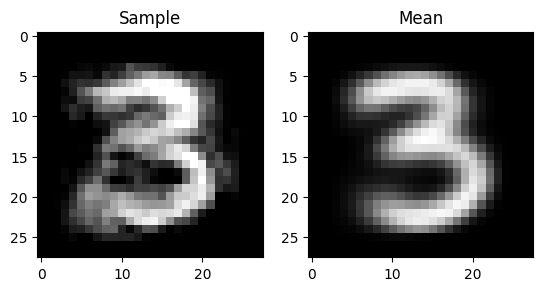

(array([[ 1.83733602e-04, -3.25892825e-04,  9.26840097e-04,
        -8.88931977e-04,  1.23149730e-03,  3.53079716e-04,
         3.43133307e-04, -2.51954491e-04, -4.06497766e-05,
        -2.14804837e-04,  3.00675625e-04,  1.25952886e-03,
         3.04116195e-04,  5.36151102e-04,  2.86451659e-04,
         2.67304617e-04, -7.53839352e-04, -6.27273874e-05,
        -8.55926860e-05, -9.20316756e-04,  1.21687498e-03,
         4.47991668e-04, -1.36848129e-04, -2.22641922e-04,
        -1.22629730e-03, -3.21929989e-04,  9.38356320e-04,
        -9.73965744e-05, -4.22770803e-04,  2.97277250e-04,
         2.00634720e-05, -1.84677269e-04,  5.71733044e-04,
         3.44879042e-04,  1.59851279e-03,  7.78129868e-04,
         4.31218583e-05,  4.60049782e-05, -2.90976746e-04,
         5.70202280e-04,  4.91267752e-04,  5.65808601e-05,
        -9.00497932e-04,  1.41490901e-03,  4.19019860e-04,
        -1.70835353e-04,  1.01657084e-03, -1.00518290e-04,
         5.00115180e-04,  7.38513289e-04,  1.80274322e-

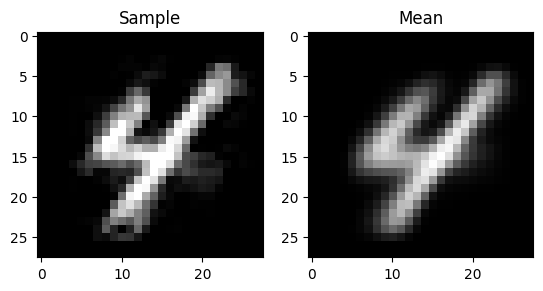

(array([[ 2.59043947e-04, -9.46318044e-04, -9.24863310e-04,
         1.63643994e-04,  5.59895145e-04,  9.79324153e-04,
         3.03687238e-04, -1.93550671e-04,  3.88001999e-04,
        -5.86631342e-04,  5.11892853e-04,  3.79163687e-05,
         5.03559861e-04,  7.40487864e-04,  4.16022792e-04,
        -1.26515663e-04, -4.96118292e-04, -7.46512286e-04,
         7.75901949e-04,  2.38765889e-04, -4.23188223e-04,
         7.32435185e-05, -2.59544215e-04, -5.76339120e-04,
         8.12645824e-04,  4.42102116e-04, -6.55326316e-04,
         3.68275734e-05, -4.33816124e-04, -5.15423240e-04,
        -5.88662748e-04,  5.13578953e-04,  1.17262008e-03,
         1.72304309e-05,  3.64786810e-04,  2.53876249e-04,
         8.79845961e-04, -7.69203739e-04, -1.69951565e-04,
         2.32387822e-04, -5.39783936e-04, -7.18288581e-04,
        -5.48594450e-04,  8.14470356e-04,  1.65213915e-04,
         2.10983583e-04,  8.41988951e-05, -1.19975034e-03,
        -3.85587808e-04, -2.17139336e-05,  7.72681224e-

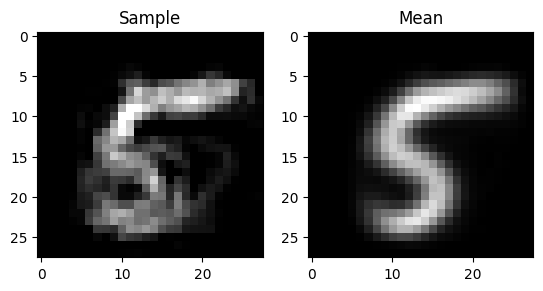

(array([[ 6.13410952e-04, -1.18006070e-03,  3.17288705e-04,
         4.40380697e-04, -1.19697517e-03, -9.31351755e-05,
        -9.47543957e-04, -5.49129737e-04, -1.74486891e-04,
         6.47920982e-04, -1.98986219e-04,  1.75786113e-03,
        -5.13439340e-04, -4.79099096e-04,  2.87901947e-04,
         1.30343878e-04, -6.61470560e-04,  4.50407625e-04,
        -6.09803351e-04,  1.39517285e-04,  4.82315519e-04,
         6.41231407e-05, -1.19132656e-03, -6.23456810e-05,
        -1.52141575e-03, -2.95923890e-04, -3.18640947e-04,
         5.21608904e-04,  4.93400772e-04, -3.24702995e-04,
         2.73971715e-04,  1.10048420e-03, -1.46920463e-04,
        -6.03466902e-05, -6.94739197e-04, -2.45067199e-03,
        -1.45229074e-03,  4.50327791e-04,  3.20764937e-04,
         2.32667699e-03,  5.75004476e-03,  8.58771363e-04,
         6.87163540e-04,  1.16484200e-03,  7.56212049e-04,
         6.53414339e-03,  3.12276401e-02,  5.77454972e-03,
         4.49497182e-03, -6.28431679e-04,  1.84225865e-

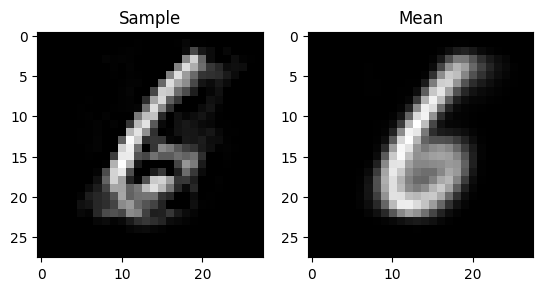

(array([[ 8.25280984e-04,  7.40989674e-04,  2.26940220e-05,
         6.98721051e-04, -5.28674735e-04,  2.62622638e-04,
        -1.93618093e-04, -4.93006101e-04,  5.61903741e-04,
        -6.32642922e-04,  1.97370131e-04,  1.05014548e-03,
         1.63042175e-04,  6.41300526e-05,  3.14946112e-04,
         3.96168892e-04,  4.47227323e-04, -7.81047202e-06,
        -7.57599251e-04,  6.96405057e-05,  1.09626512e-03,
        -7.84932443e-04,  1.38149087e-04, -4.73664945e-04,
         4.30893789e-04, -8.09291898e-04,  1.17189233e-03,
         3.92211742e-04,  1.12498050e-03, -5.83456689e-04,
         1.66842174e-04, -1.83530407e-04,  4.55524497e-04,
         1.36778403e-03,  1.89891490e-04,  2.83975134e-04,
        -2.86752048e-04, -1.55967488e-03, -8.60602264e-04,
        -1.06914564e-05,  3.07930669e-04,  3.83430361e-04,
        -1.09678497e-03,  3.54372414e-04,  1.15647443e-04,
         3.34657397e-04,  1.14700307e-04, -7.13480625e-04,
        -1.71706084e-04, -4.74809811e-04,  6.04066733e-

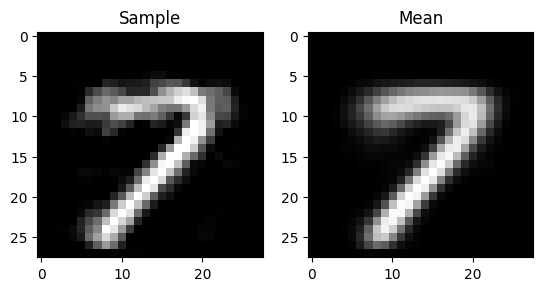

(array([[-6.26285675e-04, -1.87470396e-04,  1.03590927e-04,
        -2.02541521e-04, -6.45503907e-04,  1.97158321e-04,
        -3.81360396e-04,  2.05138511e-04, -2.30385170e-04,
         8.74791558e-05, -1.36395811e-04,  1.23555243e-04,
         1.66258099e-05, -7.54106243e-05, -4.53755033e-04,
         1.27308324e-04,  5.90970985e-04,  3.76533585e-04,
        -3.11966956e-04, -2.69987727e-04,  5.83611431e-04,
        -5.87837584e-04,  4.23066513e-04, -6.22767180e-04,
         2.57540590e-04,  3.40640024e-04, -3.40069698e-04,
         2.73051590e-04,  2.91241014e-04, -3.02808128e-04,
         5.33814517e-04,  3.68522501e-05, -6.13930838e-04,
        -2.73766245e-04, -3.69335840e-04, -6.77409992e-04,
         6.25654482e-04,  7.64539617e-05,  8.56036478e-04,
         3.42456299e-04, -4.04574090e-04, -1.53181389e-04,
        -4.89930344e-04,  3.23014576e-04, -7.93025977e-04,
        -3.97451121e-04,  1.10573294e-03,  4.40685978e-05,
         7.33428004e-04,  4.94542245e-05,  9.31517609e-

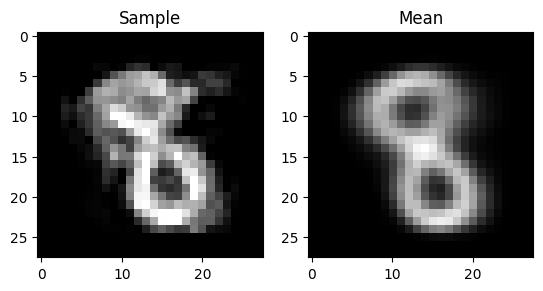

(array([[-2.72508348e-04,  4.81060926e-04,  4.49635246e-04,
        -6.58282634e-04,  1.19991330e-03, -7.13429840e-05,
         2.38911226e-04,  8.77392445e-04,  8.10164483e-04,
        -4.94368854e-07,  6.18484340e-04,  2.78050281e-04,
        -4.55961898e-04,  2.41151391e-04,  1.50438376e-05,
         3.25739603e-04,  1.26571191e-03, -5.51137591e-04,
         1.54699299e-04, -8.64955792e-05, -1.04588935e-03,
         1.34449480e-05,  9.76800635e-04,  2.89729436e-04,
         6.26031120e-05, -5.18359881e-04,  1.69899686e-04,
        -3.53011067e-04,  2.54368229e-04, -5.21934786e-04,
        -9.53418558e-04,  6.42765533e-05, -1.13888422e-03,
         1.81777767e-04, -1.06533141e-04,  5.80455020e-05,
        -8.08251523e-04, -3.23846115e-05, -6.57711786e-04,
        -7.89830971e-04,  9.93355317e-04,  8.28216746e-04,
        -9.29933212e-04,  8.47009508e-05,  1.68908643e-06,
         3.68457064e-04,  7.87369118e-05,  5.41378852e-04,
        -2.19981379e-04, -3.32271662e-04, -4.29076579e-

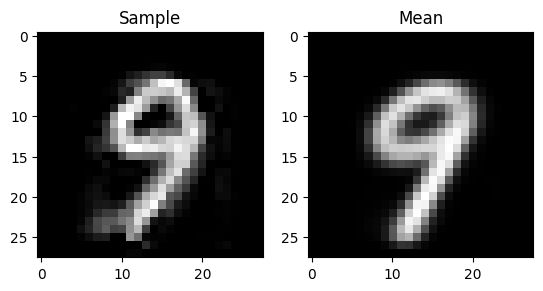

In [8]:
for k in range(clf.K):
    # Show one sample for each class also show the mean image learned
    sample, mean = clf.sample_given_y(k)

    plt.subplot(1, 2, 1)
    plt.imshow(sample, cmap='gray')
    plt.title("Sample")
    plt.subplot(1, 2, 2)
    plt.imshow(mean, cmap='gray')
    plt.title("Mean")
    plt.show()

(array([[ 3.54553959e-04, -1.44432307e-03, -4.14362602e-04,
         1.59614281e-05, -2.74763269e-04, -4.12122665e-04,
        -8.26425763e-05, -1.64588862e-04,  3.20470181e-05,
         1.69769481e-04, -3.98505384e-04, -1.79040431e-04,
        -3.32797930e-04, -4.23112061e-04, -1.47681316e-03,
         1.85565362e-04,  3.74782366e-04,  2.28174578e-04,
        -1.55438049e-04,  1.18398967e-04,  8.98660773e-05,
         9.64343932e-04, -8.29412558e-04,  2.61599596e-04,
         1.68180855e-05,  9.08920474e-05,  8.14478533e-06,
         5.22959932e-04, -4.10685992e-04, -1.33692302e-04,
         6.73664970e-04,  6.77351168e-04,  2.03465500e-04,
        -4.91771060e-04, -9.94034026e-04,  8.90335120e-04,
        -5.15829478e-04, -1.28090731e-03, -1.80122935e-04,
        -1.32874877e-04,  4.64718450e-04,  4.68067161e-04,
         3.28316574e-04,  2.83357059e-04, -3.33810946e-04,
        -9.36546252e-04,  3.26125560e-04,  8.26628233e-04,
        -8.63664510e-04, -1.95941471e-04, -3.95890249e-

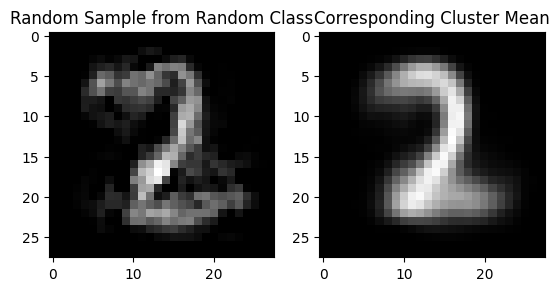

In [9]:
# Generate a random sample
sample, mean = clf.sample()
plt.subplot(1, 2, 1)
plt.imshow(sample, cmap='gray')
plt.title("Random Sample from Random Class")
plt.subplot(1,2,2)
plt.imshow(mean, cmap='gray')
plt.title("Corresponding Cluster Mean")
plt.show()

# 2. Autoencoder